In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('bajaj_train.csv')
data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,BAJAJFINSV,349.45,361.25,346.25,359.45,242661
1,2010-01-05,BAJAJFINSV,365.00,371.70,357.05,360.25,192143
2,2010-01-06,BAJAJFINSV,360.00,362.00,350.10,351.75,67893
3,2010-01-07,BAJAJFINSV,352.00,356.95,347.00,349.00,46940
4,2010-01-08,BAJAJFINSV,353.00,358.25,348.00,350.00,52937


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1495, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 22s - loss: 0.0042 - 22s/epoch - 621ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0016 - 8s/epoch - 238ms/step
Epoch 3/20
35/35 - 7s - loss: 8.4910e-04 - 7s/epoch - 191ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0013 - 8s/epoch - 222ms/step
Epoch 5/20
35/35 - 8s - loss: 7.7871e-04 - 8s/epoch - 233ms/step
Epoch 6/20
35/35 - 8s - loss: 7.3770e-04 - 8s/epoch - 228ms/step
Epoch 7/20
35/35 - 7s - loss: 6.3929e-04 - 7s/epoch - 199ms/step
Epoch 8/20
35/35 - 8s - loss: 9.7992e-04 - 8s/epoch - 220ms/step
Epoch 9/20
35/35 - 8s - loss: 6.3690e-04 - 8s/epoch - 223ms/step
Epoch 10/20
35/35 - 8s - loss: 8.0097e-04 - 8s/epoch - 222ms/step
Epoch 11/20
35/35 - 8s - loss: 7.3556e-04 - 8s/epoch - 220ms/step
Epoch 12/20
35/35 - 7s - loss: 6.8667e-04 - 7s/epoch - 199ms/step
Epoch 13/20
35/35 - 7s - loss: 5.5238e-04 - 7s/epoch - 203ms/step
Epoch 14/20
35/35 - 6s - loss: 5.9009e-04 - 6s/epoch - 184ms/step
Epoch 15/20
35/35 - 6s - loss: 6.2429e-04 - 6s/epoch - 178ms/step
Epoch 16/20
35/35 - 8s - loss

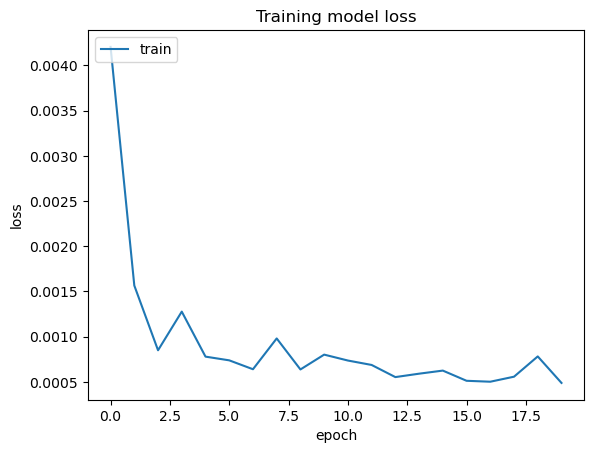

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('bajaj_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(926, 60, 1)

In [13]:
y_pred=model.predict(X_test)
y_pred

29/29 [==============================] - 9s 103ms/step


array([[0.78147364],
       [0.7841942 ],
       [0.7880368 ],
       [0.7933667 ],
       [0.7998782 ],
       [0.8069669 ],
       [0.8141041 ],
       [0.8205824 ],
       [0.82611024],
       [0.83071506],
       [0.83450806],
       [0.8382492 ],
       [0.8433038 ],
       [0.8494535 ],
       [0.85594434],
       [0.86216486],
       [0.8677578 ],
       [0.8726281 ],
       [0.8763978 ],
       [0.87913704],
       [0.88096356],
       [0.8834478 ],
       [0.88697875],
       [0.8911561 ],
       [0.895175  ],
       [0.8985046 ],
       [0.9006192 ],
       [0.9012286 ],
       [0.90106916],
       [0.9005511 ],
       [0.8997563 ],
       [0.8985957 ],
       [0.89719296],
       [0.89569664],
       [0.8935069 ],
       [0.8904108 ],
       [0.88558424],
       [0.87943804],
       [0.873106  ],
       [0.86765754],
       [0.8642826 ],
       [0.8630141 ],
       [0.8630269 ],
       [0.86374736],
       [0.8655303 ],
       [0.86864793],
       [0.87298226],
       [0.877

In [14]:
predicted_price=sc.inverse_transform(y_pred)

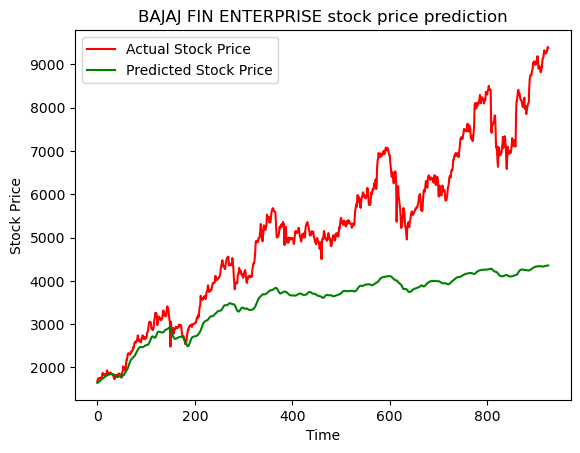

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('BAJAJ FIN ENTERPRISE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [150]:
cutoff=1.8672
y_pred_classes = np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1

In [151]:
sum(y_pred)/len(y_pred)

array([1.8672701], dtype=float32)

In [152]:
sum(y_test)/len(y_test)

array([5211.97321814])

In [155]:
cutoff=4800
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1

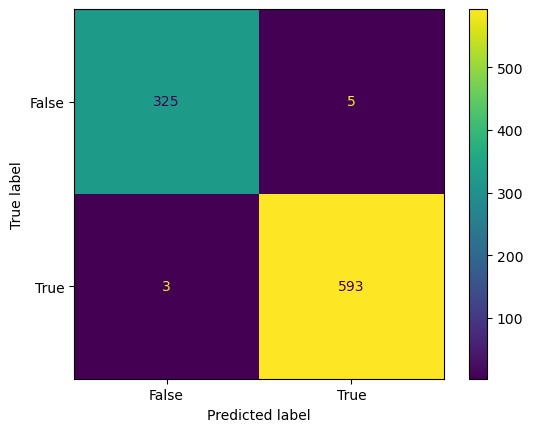

In [156]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_classes,y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [90]:
len(y_pred)

926